In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

# Regression import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Configure code auto-completion
%config Completer.use_jedi = False

# Set working directory
os.chdir('/notebooks/ml project/')


In [2]:
# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv("beatles_spotify-Copy1.csv") 

In [3]:
# Remove unnecessary columns 
data = df.drop(['id','uri','instrumentalness','liveness','loudness','speechiness','tempo','duration_ms', 'release_date'],axis=1)
data = data.drop('Unnamed: 0', axis=1)

In [4]:
# Define helper function to classify albums into non-ablum, live, or studio-recording
def helper_function(row, data, category_1_list):
    album = row['album']

    if album in category_1_list:
        return 0 #non-album
    elif 'live' in album.lower():
        return 1 #live
    else:
        return 2 #studio recording

# Non-albums list
category_1_list = ['Revolver (Super Deluxe)', 'Get Back (Rooftop Performance)',
 'Let It Be (Super Deluxe)', 'Abbey Road (Super Deluxe Edition)',
 'The Beatles', 'Let It Be... Naked (Remastered)', "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)",
 "Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)"]
        
# Use apply method to classify the albums 
data['category'] = data.apply(helper_function, args=(data, category_1_list), axis=1)
    


In [5]:
# Creates new CSV file with required changes
data.to_csv("new_csv.csv", sep=',', index=False, encoding='utf-8')

In [6]:
# Define the feature vector by non-feature columns
X = (data.drop(["name", "album", "popularity"], axis=1))

# Define the label 
y = data["popularity"]

In [7]:
# Split 20% of data for testing
X_training_split, X_testing_split, y_training_split, y_testing_split = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
k = 10  # Number of folds for cross-validation
degrees = range(1,7)  # Polynomial degrees to try

# Outer for loop for polynomial degrees
for j in degrees:
    print("")
    print("For polynomial with degree", j)
    print("")

    lin_regr = LinearRegression()
    regr = PolynomialFeatures(j) #create PolynomialFeatures with current degree
    
    # Lists to store training and validation errors for each fold
    tr_errors = []
    val_errors = []

    # Perform k-fold cross-validation with a random state
    kfold = KFold(n_splits=k, shuffle=True)
    
    # Inner for loop for k-cross validation
    for train_index, val_index in kfold.split(X_training_split):
        # Using iloc to split the data into training and validation sets
        X_train, y_train = X_training_split.iloc[train_index], y_training_split.iloc[train_index]  
        X_val, y_val = X_training_split.iloc[val_index], y_training_split.iloc[val_index]  

        # Transform features using PolynomialFeatures
        X_poly_train = regr.fit_transform(X_train)
        lin_regr.fit(X_poly_train, y_train)
        y_pred_train = lin_regr.predict(X_poly_train)
        X_poly_val = regr.transform(X_val)
        y_pred_val = lin_regr.predict(X_poly_val)

        # Calculate and store training and validation errors
        tr_error = mean_squared_error(y_train, y_pred_train)
        tr_error_validation = mean_squared_error(y_val, y_pred_val)
        tr_errors.append(tr_error)
        val_errors.append(tr_error_validation)
    
    # Calculate and print average training and validation errors
    average_train_error = np.mean(tr_errors)
    average_val_error = np.mean(val_errors)

    print('Average training error is:', average_train_error)
    print('Average validation error is:', average_val_error)



For polynomial with degree 1

Average training error is: 148.4154373729702
Average validation error is: 153.522334073433

For polynomial with degree 2

Average training error is: 95.06691814786618
Average validation error is: 109.8871268947984

For polynomial with degree 3

Average training error is: 80.08643858651698
Average validation error is: 114.20219221338667

For polynomial with degree 4

Average training error is: 93.90275697697719
Average validation error is: 569.5821429942768

For polynomial with degree 5

Average training error is: 30.969749227988153
Average validation error is: 193477.2590162914

For polynomial with degree 6

Average training error is: 0.0065892036706901
Average validation error is: 125053676.86907256


In [9]:
import pandas as pd

# Create a dictionary with the data
table = {
    "Polynomial Degree": [1, 2, 3, 4, 5, 6],
    "Average Training Error": [154.462, 123.075, 80.126, 215.796, 173.791, 0.088],
    "Average Validation Error": [157.355, 140.186, 111.436, 743.004, 13093.393, 141481455.589]
}

# Create a DataFrame from the dictionary
hi = pd.DataFrame(table)

# Print the DataFrame
print(hi)

   Polynomial Degree  Average Training Error  Average Validation Error
0                  1                 154.462              1.573550e+02
1                  2                 123.075              1.401860e+02
2                  3                  80.126              1.114360e+02
3                  4                 215.796              7.430040e+02
4                  5                 173.791              1.309339e+04
5                  6                   0.088              1.414815e+08


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#predicted_label = lin_regr.predict(regr.transform(X_test))
#print(len(predicted_label))
#print(len(y_test))

for j in range (1, 7):
    print("")
    print("for polynomial with degree", j)
    print("")
    lin_regr = LinearRegression()
    regr = PolynomialFeatures(j)
    X_poly = regr.fit_transform(X_train)
    lin_regr.fit(X_poly, y_train)

    predicted_label = lin_regr.predict(regr.transform(X_test))

    
    y_pred = lin_regr.predict(X_poly)
    
    X_poly_val = regr.transform(X_test)  # Use transform, not fit_transform
    y_val = lin_regr.predict(X_poly_val)

    array = []
    for i in range(0, 135):            
        #print(f"{predicted_label[i]} , {y_test.to_numpy()[i]} , {abs(predicted_label[i] - y_test.to_numpy()[i])}")
        array.append(abs(predicted_label[i] - y_test.to_numpy()[i]))
        
    tr_error =  mean_squared_error(y_train, y_pred)
    print('The training error is: ', tr_error)    # print the training error
    tr_error_validation = mean_squared_error(y_test, y_val)
    print('The validation error is: ',tr_error_validation)
    print("max difference", max(array))


for polynomial with degree 1

The training error is:  148.66933919727632
The validation error is:  179.87724128663808
max difference 49.348109953870576

for polynomial with degree 2

The training error is:  96.01809617291998
The validation error is:  113.75114110332949
max difference 30.9183349609375

for polynomial with degree 3

The training error is:  80.07041441234954
The validation error is:  113.07126928804857
max difference 36.95713806152344

for polynomial with degree 4

The training error is:  69.28159526067611
The validation error is:  364.81653503758963
max difference 134.57082843780518

for polynomial with degree 5

The training error is:  147.45736003645249
The validation error is:  703110.3181586823
max difference 9187.809047996998

for polynomial with degree 6

The training error is:  0.005274512502213299
The validation error is:  149191167.1889947
max difference 126097.55100358512


/opt/software/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


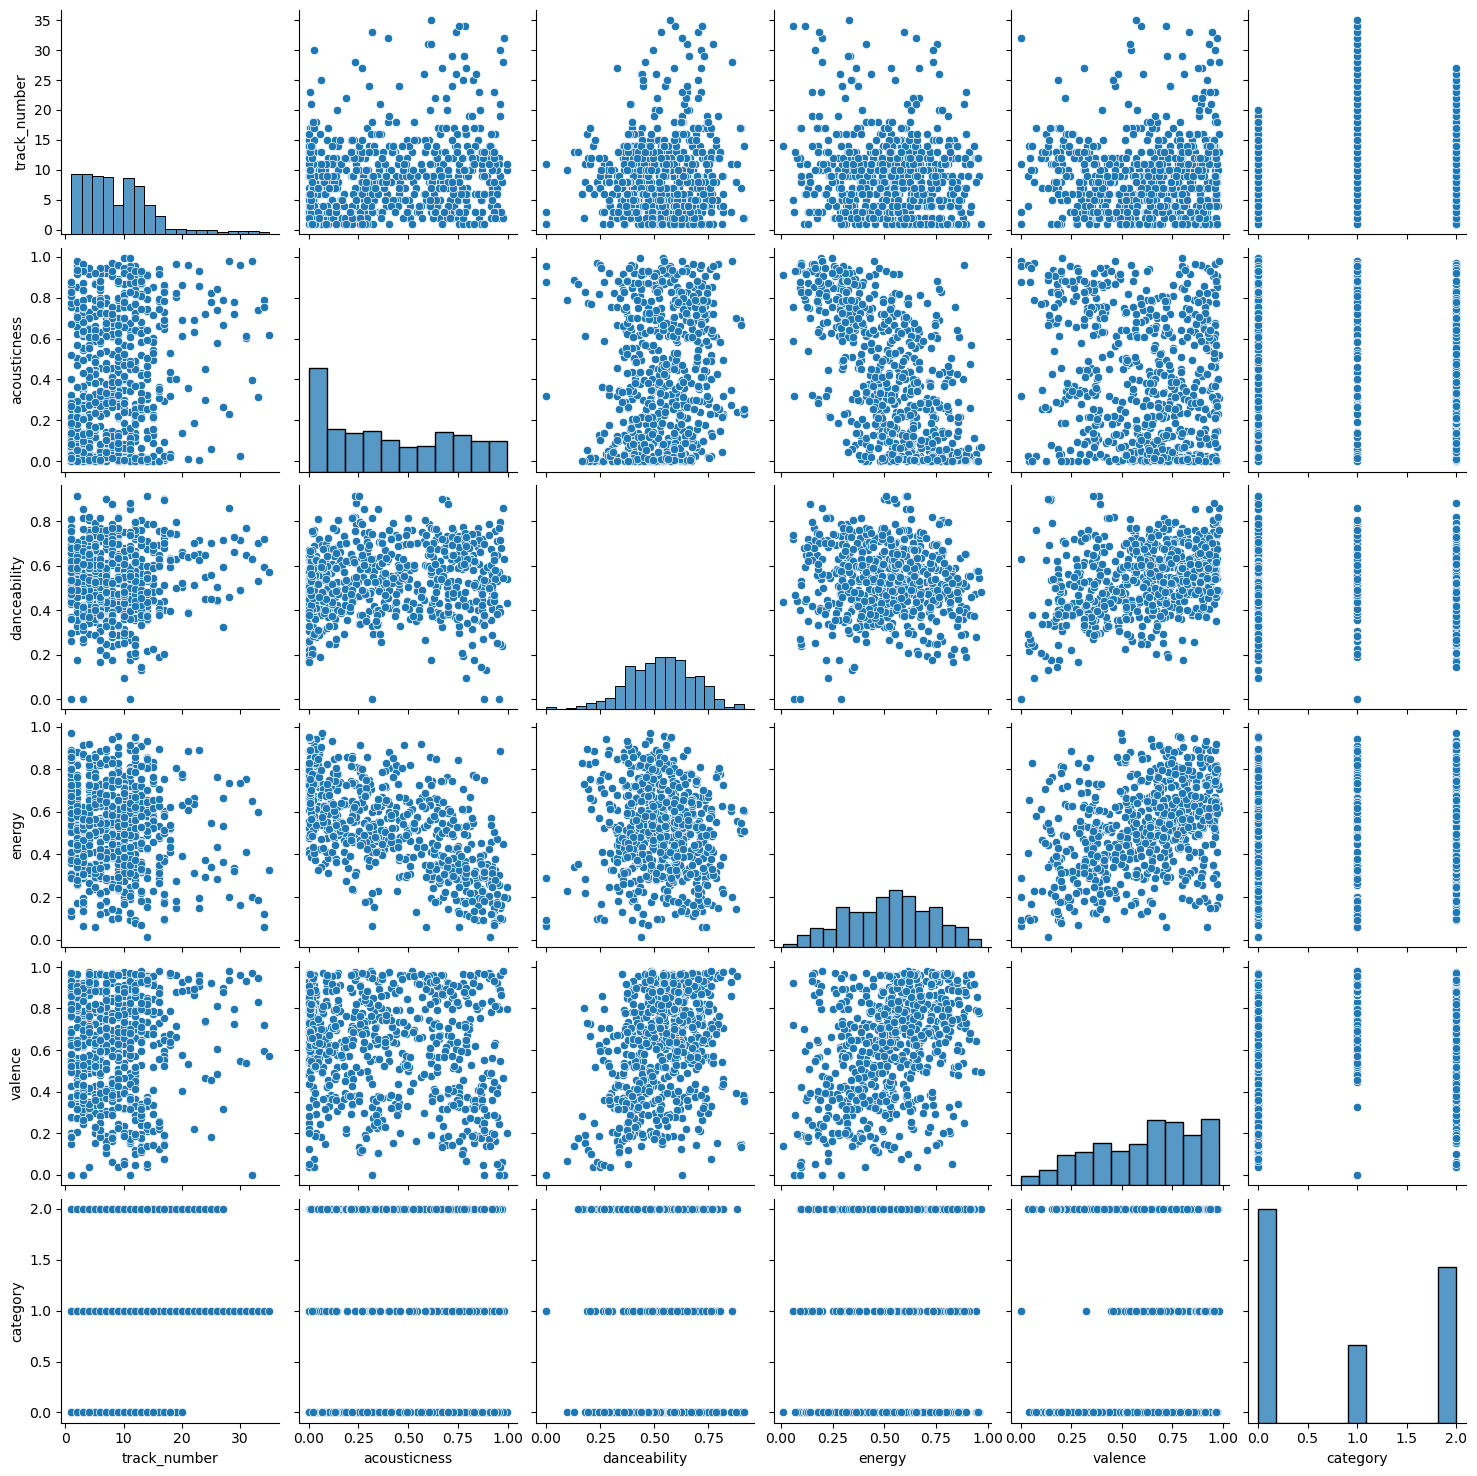

In [58]:
seaborn.pairplot(X)

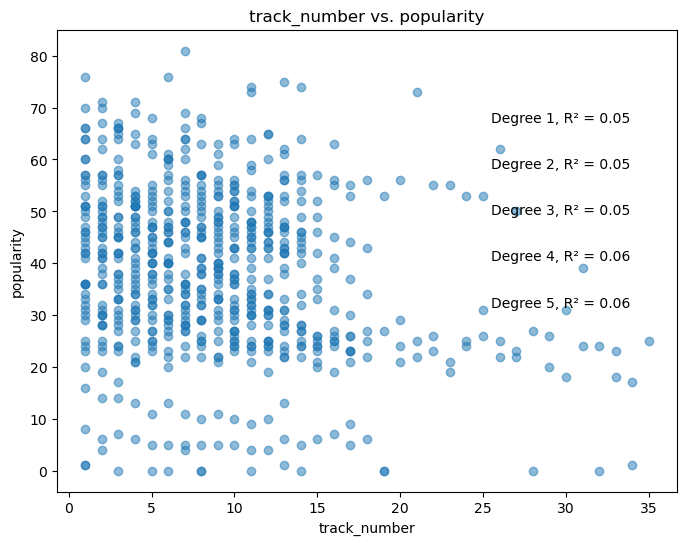

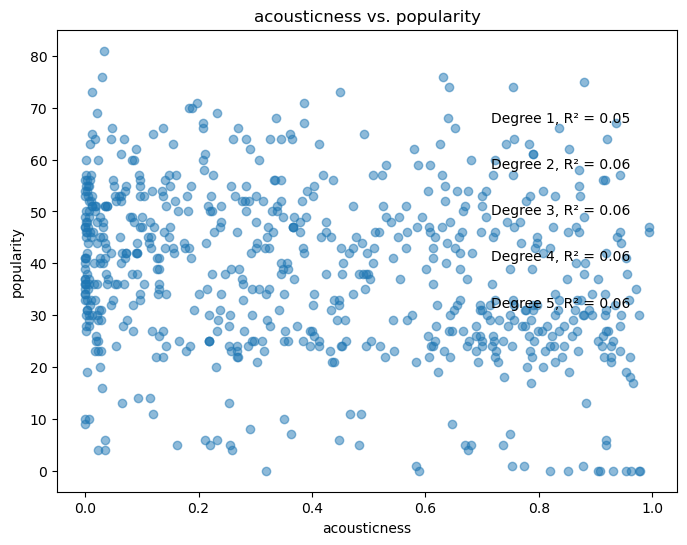

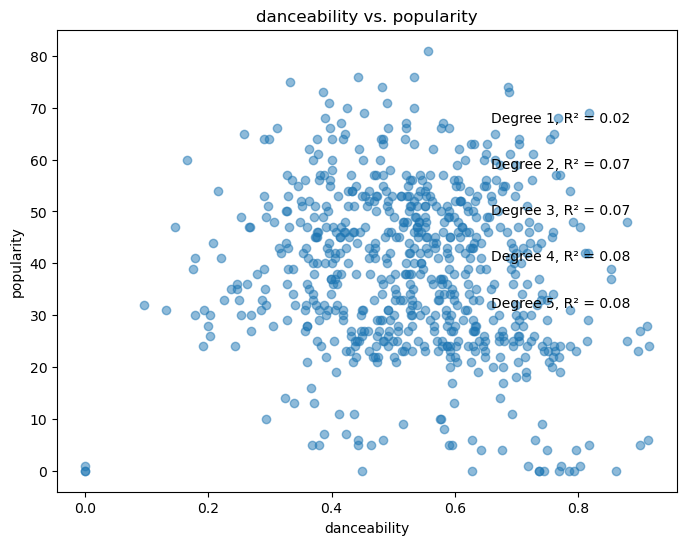

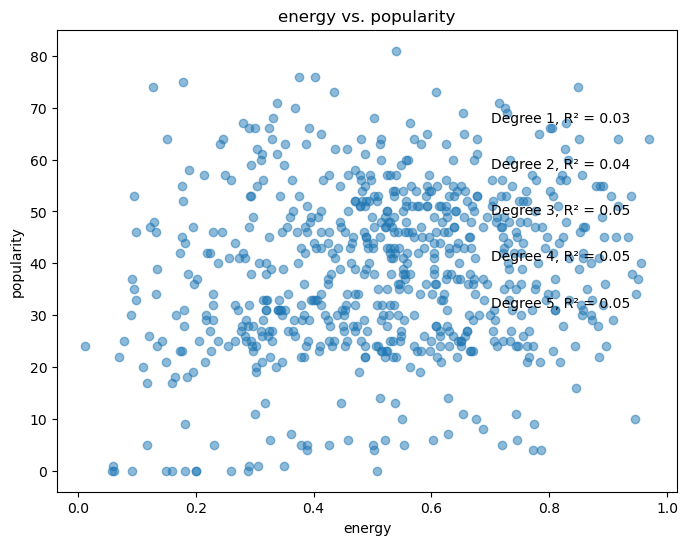

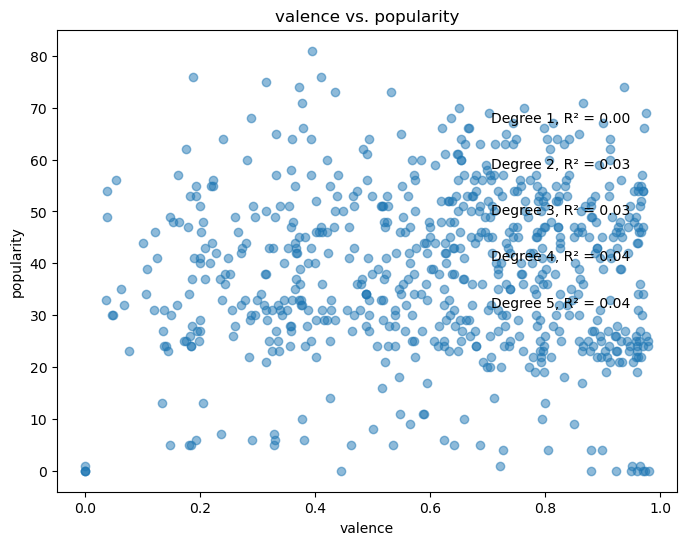

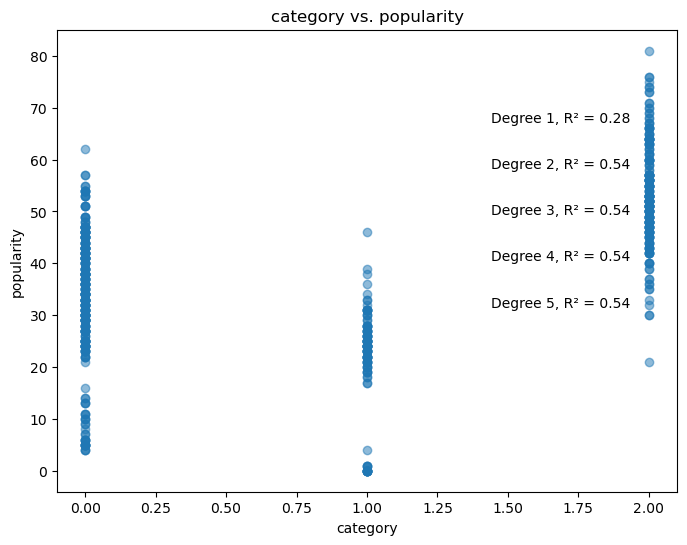

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# List of feature column names
feature_columns = ['track_number', 'acousticness', 'danceability', 'energy', 'valence', 'category']

# Label column name (replace with your actual label column)
label_column = 'popularity'

# Specify the degrees of the polynomials to try
poly_degrees = [1, 2, 3, 4, 5]

# Loop through each feature
for feature in feature_columns:
    # Extract feature and label data
    x = data[feature].values.reshape(-1, 1)
    y = data[label_column]

    # Create scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'{feature} vs. {label_column}')
    plt.xlabel(feature)
    plt.ylabel(label_column)

    # Fit polynomial regression models and calculate R-squared for each degree
    for degree in poly_degrees:
        # Transform features to polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        x_poly = poly_features.fit_transform(x)

        # Fit a polynomial regression model
        poly_regr = LinearRegression()
        poly_regr.fit(x_poly, y)

        # Predict using the polynomial model
        y_pred = poly_regr.predict(x_poly)

        # Calculate R-squared
        r_squared = r2_score(y, y_pred)

        # Display the polynomial degree and R-squared on the plot
        plt.text(0.7, 0.9 - degree * 0.1, f'Degree {degree}, R² = {r_squared:.2f}', transform=plt.gca().transAxes)

    plt.show()
